## Question 13.1
For each of the following distributions, give an example of data that you would expect to follow this distribution
(besides the examples already discussed in class).
### Solution 13.1
1.	**Binomial**<br>
Basically anything that has two choices among different number of experiments can be modeled with a binomial
distribution. For instance in Ecuador we have the elections for president and in the final round we have to choose
among two candidates. This situation can be modeled with a binomial distribution.

2.	**Geometric**<br>
In the oil & gas industry we could perhaps model the number of good wells until the first bad wall. Although some might
argue that the drilling of wells are not independent of one to another

3.	**Poisson**<br>
Can be used to model the arrivals or hitting of asteroids to a certain planet. These events could be considered random
although they might have other factors that could affect these events, like planet size, proximity to other planets, etc

4.	**Exponential**<br>
Following the previous example, this can be used to calculate the interarrival time of asteroids to a certain planet.

5.	**Weibull**<br>
We could use it to model the failure of Electric Submersible Pumps to have an idea for predictve maintenance and OPEX
modeling

---

## Question 13.2
In this problem you, can simulate a simplified airport security system at a busy airport. Passengers arrive according
to a Poisson distribution with λ1 = 5 per minute (i.e., mean interarrival rate $\mu_1 = 0.2$ minutes) to the ID/boarding-pass
check queue, where there are several servers who each have exponential service time with mean rate $\mu_2 = 0.75$ minutes.
(Hint: model them as one block that has more than one resource.)  After that, the passengers are assigned to the
shortest of the several personal-check queues, where they go through the personal scanner (time is uniformly distributed
between 0.5 minutes and 1 minute).

Use the Arena software (PC users) or Python with SimPy (PC or Mac users) to build a simulation of the system, and then
vary the number of ID/boarding-pass checkers and personal-check queues to determine how many are needed to keep average
wait times below 15 minutes.  (If you’re using SimPy, or if you have access to a non-student version of Arena,
you can use λ1 = 50 to simulate a busier airport.)

### Solution 13.2

In [1]:
from isye_6501_sim_hw.oscar_solution.hw_9.sim_setup import run_sim
import pandas as pd
import matplotlib.pyplot as plt
import random
from collections import defaultdict
import seaborn as sns
import pandas as pd
sns.set_style("darkgrid")

RANDOM_SEED = 42
SIM_TIME = 480

### Define a function to analyze results
This function will create some plots and also create a dataframe with results information.

In [2]:
def analyze_sim_results(results: dict):

    # Define the column names in the results dataframe
    elapsed_time = "elapsed_time"
    passenger_name = "passenger_name"
    wait_time = "wait_time"
    total_time = "total_time"
    id_check_time = "id_check_time"
    scanner_check_time = "scanner_check_time"
    arrival_time = "arrival_time"

    df_results = pd.DataFrame(results)
    print(f"Mean waiting time: {df_results[wait_time].mean()}")

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    sns.lineplot(data=df_results, x=elapsed_time, y=wait_time, ax=axs[0, 0])
    sns.histplot(data=df_results, x=wait_time, kde=True, bins=50, ax=axs[0, 1])
    sns.histplot(data=df_results, x=id_check_time, kde=True, bins=50, ax=axs[1, 0])
    sns.histplot(data=df_results, x=scanner_check_time, kde=True, bins=50, ax=axs[1, 1])
    fig.suptitle("Simulation Results", fontsize=20)
    wait_time_label = "Wait Time (Minutes)"
    axs[0, 0].set_ylabel(wait_time_label)
    axs[0, 1].set_xlabel("Elapsed Simulation Time (Minutes)")
    axs[0, 1].set_xlabel(wait_time_label)
    plt.tight_layout()

### Setup the first simulation
This first simulation is with an arrival of 5 people per minute. To show

Mean waiting time: 3.204267969750732


,elapsed_time,passenger_name,wait_time,total_time,id_check_time,scanner_check_time,arrival_time
2341,479.258437,Passenger_2343,0.905427,2.141198,0.434971,0.800800,477.117239
2342,479.322502,Passenger_2341,0.923083,2.443948,0.548830,0.972035,476.878554
2343,479.416685,Passenger_2344,1.033353,2.189317,0.504334,0.651630,477.227368
2344,479.828281,Passenger_2345,1.391093,2.066080,0.103917,0.571070,477.762201
2345,479.930293,Passenger_2350,0.711760,1.350388,0.030837,0.607791,478.579905


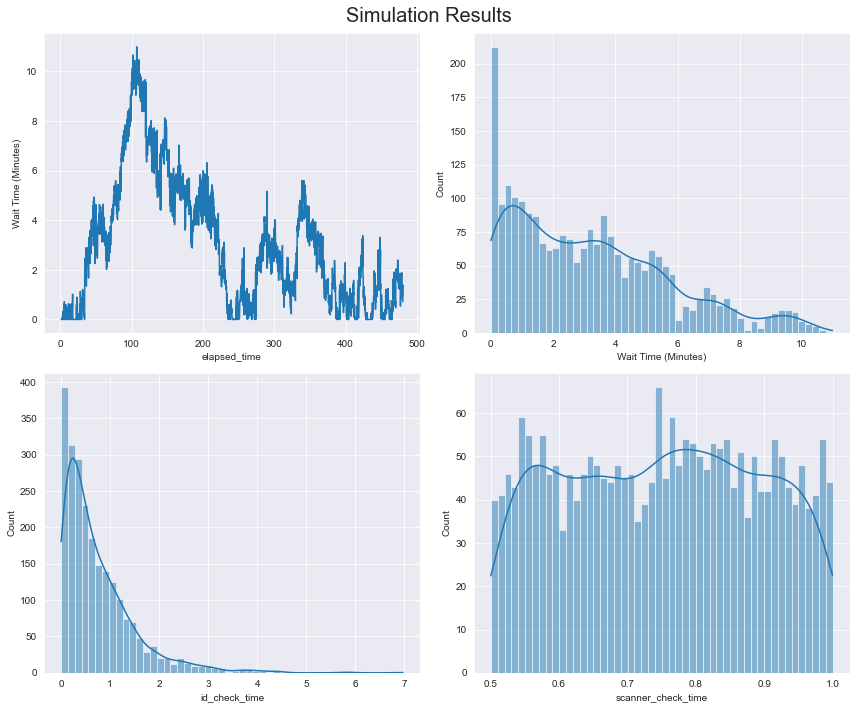

In [3]:
random.seed(RANDOM_SEED)
results_sim_1 = defaultdict(list)
sim_1 = dict(num_id_check_stands=4, num_scanner_stands=4,  # Resources definition
             mean_id_check_time=0.75, max_time_scan=[0.5, 1], interarrival_time=0.2, # Time definitions
             sim_time=SIM_TIME, results=results_sim_1, debug=False)  # Simulation

run_sim(**sim_1)
analyze_sim_results(results_sim_1)
df_results = pd.DataFrame(results_sim_1)
df_results.tail()

After checking several values of id check stand and personal scanner stands, I can only keep the values below  15 min
using 4 id check stands and 4 personal scanner stands. Although the mean waiting is around 3 mintues, when using lower
values than either of those, I am getting waiting times of more than 40 minutes. That's why I stuck with these values.

Also in the plot you can clearly see the waiting time against the simulation time. In this simulation there is a peak of
12 min waiting times at around 100 min of simulation but then the waiting time values start to decrease.
The previous plot also shows the distribution of the waiting times, it clearly shows more values at lower waiting times.

For the sake of quality checks, the two plots in the second row represent the id and scanner check times distribution,
to make sure we have set up the proper distribution of these processes in the simulation.

### Simulating a busier airport
For this simulation we will use lambda = 50

Mean waiting time: 13.811763087748476


Showing the last 5 rows of the results



,elapsed_time,passenger_name,wait_time,total_time,id_check_time,scanner_check_time,arrival_time
22807,479.850164,Passenger_22805,21.881026,23.318479,0.614321,0.823132,456.531685
22808,479.854110,Passenger_22843,21.809643,22.547878,0.186511,0.551724,457.306232
22809,479.906044,Passenger_22833,21.951563,22.880319,0.274639,0.654117,457.025725
22810,479.952867,Passenger_22811,21.817106,23.267137,0.596819,0.853212,456.685730
22811,479.970579,Passenger_22806,21.896035,23.432956,0.873497,0.663424,456.537623


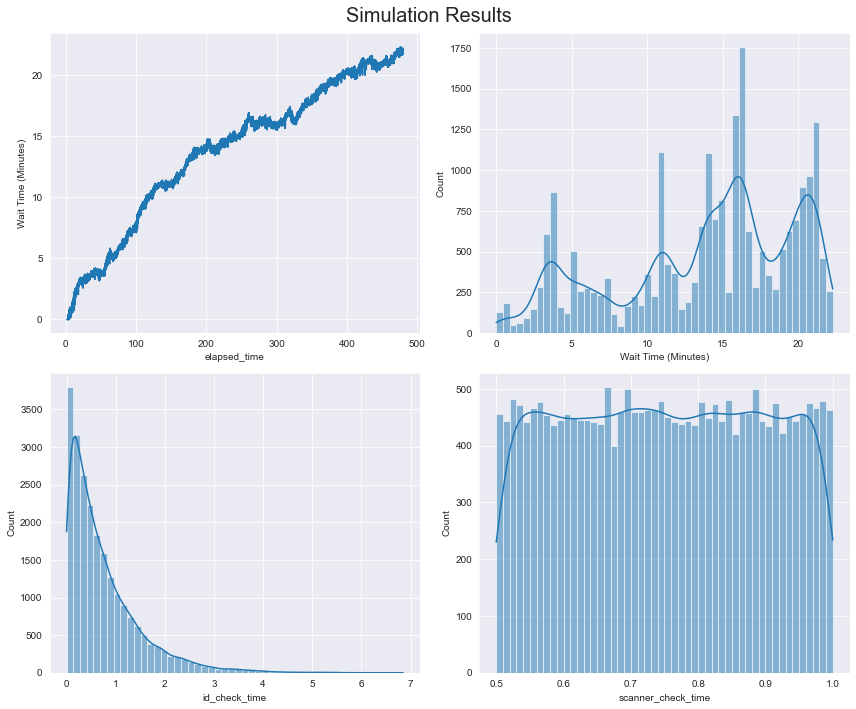

In [4]:
random.seed(RANDOM_SEED)
results_sim_2 = defaultdict(list)
sim_2 = dict(num_id_check_stands=36, num_scanner_stands=36,  # Resources definition
             mean_id_check_time=0.75, max_time_scan=[0.5, 1], interarrival_time=0.02, # Time definitions
             sim_time=SIM_TIME, results=results_sim_2, debug=False)  # Simulation

run_sim(**sim_2)
analyze_sim_results(results_sim_2)
df_results_2 = pd.DataFrame(results_sim_2)
print("\n\nShowing the last 5 rows of the results\n")
df_results_2.tail()

When simulation the busier airport, the values of id and personal scanner check stands are 36 each. These values result
in a waiting less than 14 min. For this case, we can see increasing wait times, which could indicate that if run the
simulation for a longer period of time, the average wait time value will increase.

Let's check that with a simulation time of 1000 minutes.

Mean waiting time: 23.122996382396902


Showing the last 5 rows of the results



,elapsed_time,passenger_name,wait_time,total_time,id_check_time,scanner_check_time,arrival_time
47769,999.906269,Passenger_47789,44.257919,45.446972,0.316610,0.872444,954.459297
47770,999.920676,Passenger_47726,44.526131,46.670831,1.221279,0.923421,953.249845
47771,999.924472,Passenger_47745,44.573474,46.297969,0.741054,0.983441,953.626503
47772,999.968376,Passenger_47730,44.418878,46.601886,1.232720,0.950288,953.366490
47773,999.977799,Passenger_47794,44.349542,45.426607,0.128137,0.948929,954.551191


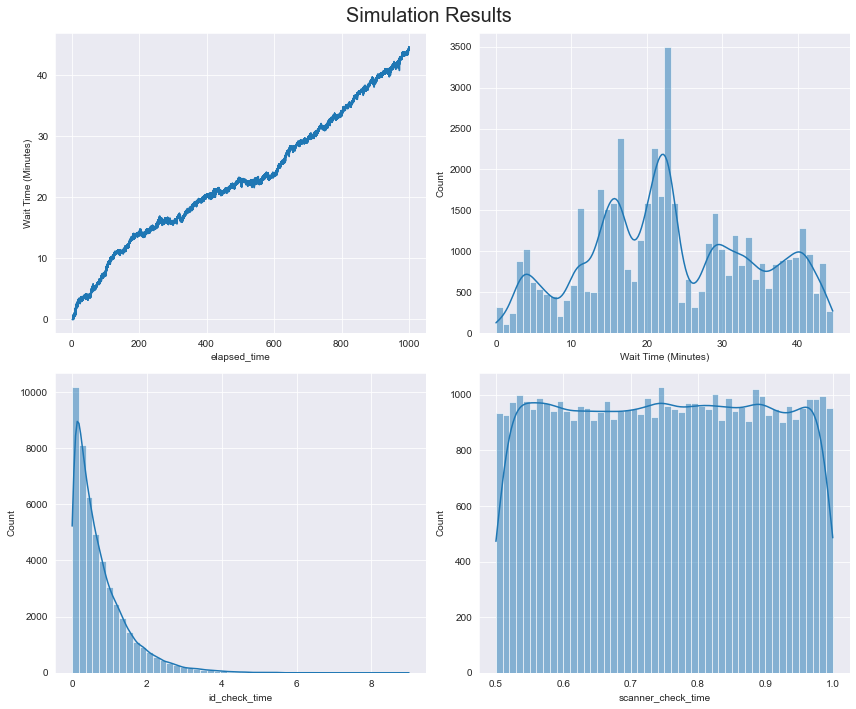

In [5]:
random.seed(RANDOM_SEED)
results_sim_3 = defaultdict(list)
sim_3 = dict(num_id_check_stands=36, num_scanner_stands=36,  # Resources definition
             mean_id_check_time=0.75, max_time_scan=[0.5, 1], interarrival_time=0.02, # Time definitions
             sim_time=1000, results=results_sim_3, debug=False)  # Simulation

run_sim(**sim_3)
analyze_sim_results(results_sim_3)
df_results_3 = pd.DataFrame(results_sim_3)
print("\n\nShowing the last 5 rows of the results\n")
df_results_3.tail()


Indeed, the average waiting time increased to 23 minutes with no sign of decrease, so we will tune the number of id and
personal scanner stands further.

Mean waiting time: 7.915194175326897


Showing the last 5 rows of the results



,elapsed_time,passenger_name,wait_time,total_time,id_check_time,scanner_check_time,arrival_time
49136,999.856322,Passenger_49122,11.358546,13.159824,1.184439,0.616839,986.696498
49137,999.927412,Passenger_49152,11.462989,12.672585,0.278949,0.930646,987.254827
49138,999.931744,Passenger_49165,11.495122,12.474081,0.219569,0.759390,987.457663
49139,999.964069,Passenger_49107,11.292686,13.570838,1.486906,0.791247,986.393230
49140,999.981367,Passenger_49163,11.211020,12.550341,0.656432,0.682888,987.431026


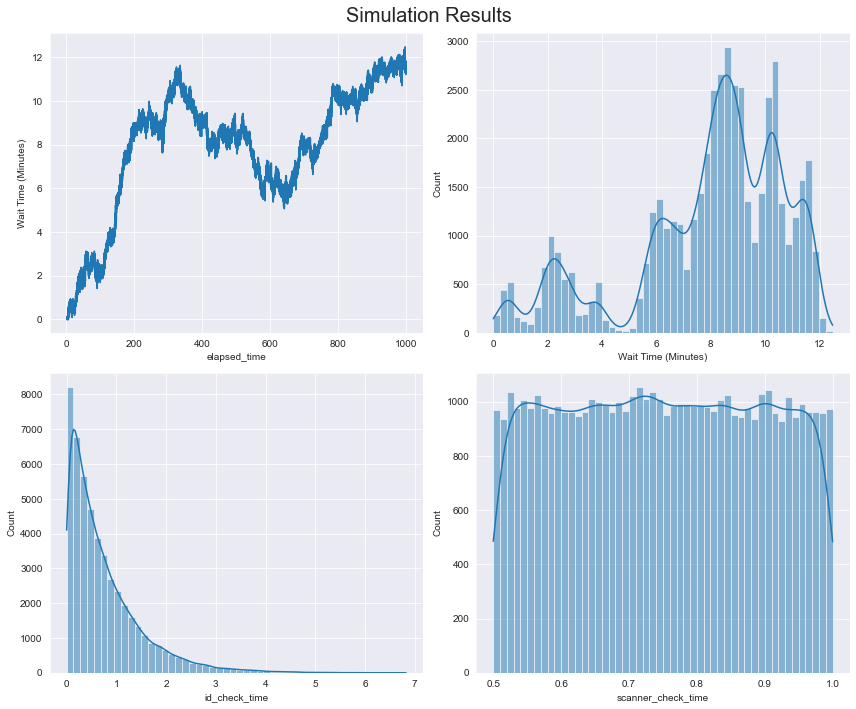

In [6]:
random.seed(RANDOM_SEED)
results_sim_4 = defaultdict(list)
sim_4 = dict(num_id_check_stands=37, num_scanner_stands=37,  # Resources definition
             mean_id_check_time=0.75, max_time_scan=[0.5, 1], interarrival_time=0.02, # Time definitions
             sim_time=1000, results=results_sim_4, debug=False)  # Simulation

run_sim(**sim_4)
analyze_sim_results(results_sim_4)
df_results_4 = pd.DataFrame(results_sim_4)
print("\n\nShowing the last 5 rows of the results\n")
df_results_4.tail()

By increasing the number of id and scanner stands by one we were able to decrease the average waiting time to 9 minutes.

## Python Code to Define Simulation

In [7]:
import random
import simpy
from typing import List, Optional, Dict


class AirportSecuritySystem(object):
    """A simplified airport security system at a busy airport has check each passenger
    in two steps.

    First, they have to pass through the ID/boarding-pass check queue, where there are
    limited number of servers. After that, the passengers are assigned to the shortest
    of the several personal-check queues, where they go through the personal scanner
    """
    def __init__(self,
                 env,
                 num_id_check_stands,
                 num_scanner_stands,
                 mean_id_check_time,
                 scanner_time_params,
                 ):

        self.env = env
        self.id_check_stand = simpy.Resource(env, num_id_check_stands)
        self.scanner_stand = simpy.Resource(env, num_scanner_stands)
        self.mean_id_check_time = mean_id_check_time
        self.scanner_time_params: List[float] = scanner_time_params

    def id_check(self, passenger_name, debug=False):
        """The ID/boarding-pass process."""
        rand_id_check_time = random.expovariate(1 / self.mean_id_check_time)

        yield self.env.timeout(rand_id_check_time)
        print(f"Checking ID of passenger {passenger_name}") if debug else None

    def scanner_check(self, passenger_name, debug=False):
        """The personal scanner check"""
        rand_scan_time = random.uniform(*self.scanner_time_params)

        yield self.env.timeout(rand_scan_time)
        print(f"Scan check of passenger: {passenger_name}") if debug else None


def security_check(env,
                   passenger_name,
                   airport_check: AirportSecuritySystem,
                   results: Optional[Dict[str, list]] = None,
                   debug: bool = False):

    """The passenger process, each passenger has a name.

    The passenger first enters the ID check and then the scanner check
    """
    # In this code we use the "with" statement that  tells the simulation to
    # automatically release the resource once the process is complete
    # This can also be accomplished with the release() method on the environment if done
    # manually

    arrival_time = env.now
    print(f"{passenger_name} arrives at the airport at {arrival_time}") if debug else None

    with airport_check.id_check_stand.request() as id_check_request:
        yield id_check_request
        start_id_check = env.now
        print(f"{passenger_name} enters the ID Check at {start_id_check}") if debug else None

        yield env.process(airport_check.id_check(passenger_name, debug))

        id_check_time = env.now - start_id_check
        print(f"{passenger_name} leaves ID Check at {env.now}") if debug else None

    with airport_check.scanner_stand.request() as scan_request:
        yield scan_request

        start_scan_check = env.now
        print(f"{passenger_name} enter the Personal Scan at {start_scan_check}") if debug else None

        yield env.process(airport_check.scanner_check(passenger_name, debug))

        scanner_check_time = env.now - start_scan_check
        print(f"{passenger_name} leaves the Personal Scan at {env.now}") if debug else None

    # We accept an empty dictionary to store the results of each passenger
    if isinstance(results, dict):
        total_time = env.now - arrival_time
        wait_time = total_time - id_check_time - scanner_check_time
        results["elapsed_time"].append(env.now)
        results["passenger_name"].append(passenger_name)
        results["wait_time"].append(wait_time)
        results["total_time"].append(total_time)
        results["id_check_time"].append(id_check_time)
        results["scanner_check_time"].append(scanner_check_time)
        results["arrival_time"].append(arrival_time)


def run_airport_check(env,
                      num_id_check_stands,
                      num_scanner_stands,
                      mean_id_check_time,
                      scanner_time_params,
                      t_inter,
                      results: Optional[Dict[str, list]] = None,
                      debug: bool = False):

    """Create an airport security check, a number of initial passengers and keep
    the passengers arriving approx. every ``t_inter`` minutes."""

    # Create the airport security check
    airport_sec_check = AirportSecuritySystem(env,
                                              num_id_check_stands,
                                              num_scanner_stands,
                                              mean_id_check_time,
                                              scanner_time_params)

    # Initialize passengers count
    i = 0

    # Keep passengers coming
    while True:
        yield env.timeout(random.expovariate(1 / t_inter))
        i += 1
        env.process(security_check(env,
                                   f"Passenger_{i}",
                                   airport_sec_check,
                                   results,
                                   debug))


# Defining a function to run the simulation to make the code more readable
def run_sim(num_id_check_stands: float,
            num_scanner_stands: float,
            mean_id_check_time: float,
            max_time_scan: List[float],
            interarrival_time: float,
            sim_time: float,
            results: dict = None,
            debug: bool = True):

    # Create an environment and start the setup process
    env = simpy.Environment()
    env.process(run_airport_check(env,
                                  num_id_check_stands,
                                  num_scanner_stands,
                                  mean_id_check_time,
                                  max_time_scan,
                                  interarrival_time,
                                  results,
                                  debug=debug))

    env.run(until=sim_time)